In [7]:
#linear regression on the dataset

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [9]:
#datasets:
train_path="C:\\Users\\shrey\\OneDrive\\Documents\\.PES\\PIL\\fin-dataset_2.csv"
test_path="C:\\Users\\shrey\\OneDrive\\Documents\\.PES\\PIL\\test_dataset.csv"
df_tr=pd.read_csv(train_path)
df_ts=pd.read_csv(test_path)
df_tr.columns
df_ts.columns
df_ts
df_tr

,Unnamed: 0,node_code,node_type,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,average_airtime,average_interference,wlan_code_index
0,0,AP_A,0,10.0000,10.0000,4,4,5,-58.226667,29.62,111.77,95.745,-107.399091,0
1,1,STA_A1,1,0.0713,10.8079,4,4,5,-65.370000,29.36,5.79,95.745,0.000000,0
2,2,STA_A2,1,1.9627,4.1427,4,4,5,-65.350000,29.48,6.11,95.745,0.000000,0
3,3,STA_A3,1,13.7849,16.7538,4,4,5,-61.410000,31.97,6.91,95.745,0.000000,0
4,4,STA_A4,1,6.7112,1.7487,4,4,5,-63.520000,31.26,9.99,95.745,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87904,87904,STA_J4,1,22.4444,46.9925,0,0,7,-68.170000,11.06,3.30,79.220,0.000000,9
87905,87905,STA_J5,1,32.0104,51.2173,0,0,7,-52.610000,32.17,43.24,79.220,0.000000,9
87906,87906,STA_J6,1,34.1608,48.5987,0,0,7,-59.770000,24.86,37.02,79.220,0.000000,9
87907,87907,STA_J7,1,31.8977,54.3313,0,0,7,-60.700000,23.68,36.86,79.220,0.000000,9


In [10]:

#import seaborn as sns
#sns.pairplot(df_tr) #each column gets plotted with another for visualizing the dataset



In [11]:
# heat maps:
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(16,16))
#n=sns.heatmap(df_tr.corr(),center=0,annot=True)

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='throughput', ylabel='Density'>

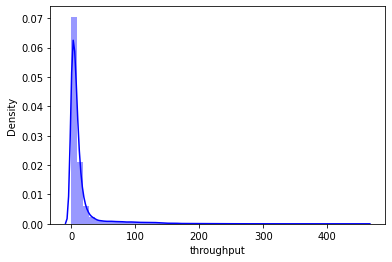

In [12]:
import seaborn as sns
sns.distplot(df_tr['throughput'],color='b') #to get a better idea on distribution

In [16]:
df_tr['throughput']
df_tr

,Unnamed: 0,node_code,node_type,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,average_airtime,average_interference,wlan_code_index
0,0,AP_A,0,10.0000,10.0000,4,4,5,-58.226667,29.62,111.77,95.745,-107.399091,0
1,1,STA_A1,1,0.0713,10.8079,4,4,5,-65.370000,29.36,5.79,95.745,0.000000,0
2,2,STA_A2,1,1.9627,4.1427,4,4,5,-65.350000,29.48,6.11,95.745,0.000000,0
3,3,STA_A3,1,13.7849,16.7538,4,4,5,-61.410000,31.97,6.91,95.745,0.000000,0
4,4,STA_A4,1,6.7112,1.7487,4,4,5,-63.520000,31.26,9.99,95.745,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87904,87904,STA_J4,1,22.4444,46.9925,0,0,7,-68.170000,11.06,3.30,79.220,0.000000,9
87905,87905,STA_J5,1,32.0104,51.2173,0,0,7,-52.610000,32.17,43.24,79.220,0.000000,9
87906,87906,STA_J6,1,34.1608,48.5987,0,0,7,-59.770000,24.86,37.02,79.220,0.000000,9
87907,87907,STA_J7,1,31.8977,54.3313,0,0,7,-60.700000,23.68,36.86,79.220,0.000000,9


In [17]:
from sklearn.model_selection import train_test_split
y=df_tr['throughput'].values #throughput 

#below part can be improved (very much)



#very hardcoded
x=df_tr[[  'node_type','x(m)', 'y(m)',
       'primary_channel', 'min_channel_allowed', 'max_channel_allowed', 'RSSI',
       'SINR', 'average_airtime','average_interference',
       'wlan_code_index']].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)  # took 0.2 as a trial number
model = LinearRegression()
model.fit(x_train, y_train)



LinearRegression()

In [18]:

print(model.coef_)
print(model.intercept_)


[ 1.61980801e+02  4.10297202e-03  7.14966064e-02 -1.61065696e+00
 -1.61065696e+00  1.96019779e+00  4.10998687e-01  1.76128854e-01
  3.26486351e-01 -2.50372387e+00 -6.08232146e-01]
-153.20707401048992


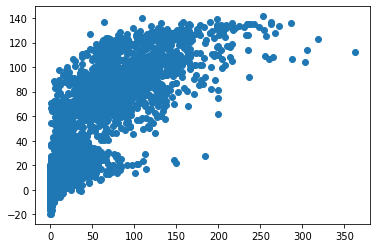

In [19]:
#putting the coeffecients in a dataframe
#pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])
predictions = model.predict(x_test)
plt.scatter(y_test, predictions)


### Using Standard Metrics like MAE,MSE to evaluate

In [20]:
# module:
from sklearn import metrics
# MAE
metrics.mean_absolute_error(y_test, predictions)
#MSE:
metrics.mean_squared_error(y_test, predictions)
np.sqrt(metrics.mean_squared_error(y_test, predictions))


13.953916730986226

In [21]:
from sklearn import metrics

r2=metrics.r2_score(y_test,predictions)
r2

0.7507985272157419